In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [2]:
full_path = Path(os.getcwd())
#load the AM and local features
cook_herm_comb_AM = pd.read_csv(Path(full_path.parent, 'data','cook_herm_combined_AM.csv'))
cook_herm_comb_lf = pd.read_csv(Path(full_path.parent, 'results','cook_herm_combined_local_features.csv'))

cook_male_comb_AM = pd.read_csv(Path(full_path.parent, 'data','cook_male_combined_AM.csv'))
cook_male_comb_lf = pd.read_csv(Path(full_path.parent, 'results','cook_male_combined_local_features.csv'))

In [3]:
#figure saving formatting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'Arial'})
plt.rcParams['pdf.fonttype'] = 42
sns.set(font_scale=1)
sns.set_theme(style='white')

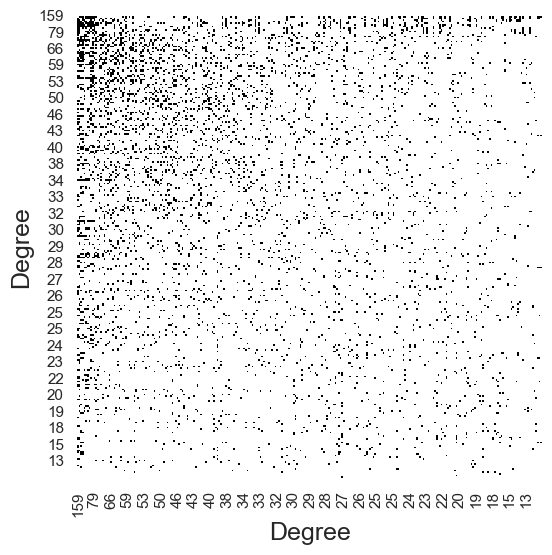

In [4]:

# Merge adjacency matrix neuron labels with the degree information
sorted_neurons = cook_herm_comb_lf[['cell_name', 'degree']].copy()

# Ensure we're only working with neurons in the adjacency matrix
sorted_neurons = sorted_neurons[sorted_neurons['cell_name'].isin(cook_herm_comb_AM['Neurons'])]

# Sort neurons by degree
sorted_neurons = sorted_neurons.sort_values(by='degree', ascending=False)

# Reorder adjacency matrix by the sorted neuron order
sorted_indices = sorted_neurons['cell_name'].values
adjacency_sorted = cook_herm_comb_AM.set_index('Neurons').loc[sorted_indices, sorted_indices]

# Replace neuron names with their degree values as labels
degree_labels = sorted_neurons.set_index('cell_name')['degree'].to_dict()
adjacency_sorted.index = adjacency_sorted.columns = adjacency_sorted.index.map(degree_labels)

# Convert the adjacency matrix to binary (1 for connection, 0 for no connection)
adjacency_binary = (adjacency_sorted > 0).astype(int)

# Plot the binary heatmap with degree labels
plt.figure(figsize=(6, 6))
sns.heatmap(adjacency_binary, cmap='Greys', cbar=False, linecolor='white', facecolor='white',rasterized=True)
#another cmap option= 'flare_r', 'Accent_r', gnuplot|

sns.set_style("whitegrid", {'axes.grid' : False})

plt.xlabel('Degree',fontsize=18)
plt.ylabel('Degree', fontsize=18)

plt.savefig(Path(full_path.parent,'figure_components/hem_degreesorted_CM.pdf'))

plt.show()


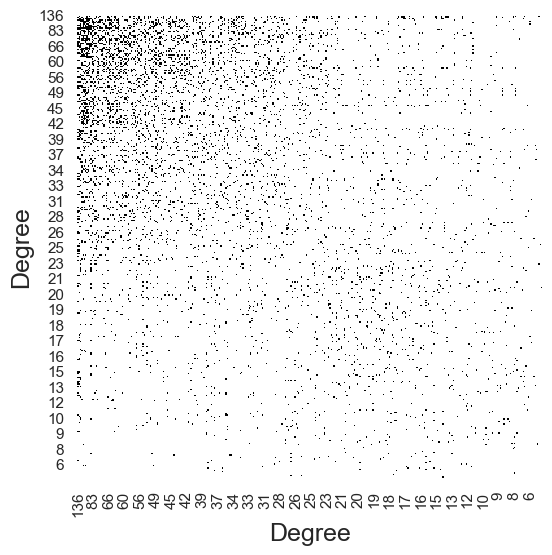

In [5]:

# Merge adjacency matrix neuron labels with the degree information
sorted_neurons = cook_male_comb_lf[['cell_name', 'degree']].copy()

# Ensure we're only working with neurons in the adjacency matrix
sorted_neurons = sorted_neurons[sorted_neurons['cell_name'].isin(cook_male_comb_AM['Neurons'])]

# Sort neurons by degree
sorted_neurons = sorted_neurons.sort_values(by='degree', ascending=False)

# Reorder adjacency matrix by the sorted neuron order
sorted_indices = sorted_neurons['cell_name'].values
adjacency_sorted = cook_male_comb_AM.set_index('Neurons').loc[sorted_indices, sorted_indices]

# Replace neuron names with their degree values as labels
degree_labels = sorted_neurons.set_index('cell_name')['degree'].to_dict()
adjacency_sorted.index = adjacency_sorted.columns = adjacency_sorted.index.map(degree_labels)

# Convert the adjacency matrix to binary (1 for connection, 0 for no connection)
adjacency_binary = (adjacency_sorted > 0).astype(int)

# Plot the binary heatmap with degree labels
plt.figure(figsize=(6, 6))
sns.heatmap(adjacency_binary, cmap='Greys', cbar=False, linecolor='white', facecolor='white',rasterized=True)

sns.set_style("whitegrid", {'axes.grid' : False})

plt.xlabel('Degree', fontsize=18)
plt.ylabel('Degree', fontsize=18)
plt.savefig(Path(full_path.parent,'figure_components/male_degreesorted_CM.pdf'))
plt.show()
